In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import DB_USERNAME, DB_PASSWORD, DB_HOST, DB_PORT, DB_NAME

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
# Create a connection string with the postgreSQL info
database_access = f"postgresql://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"


In [3]:
# Establish a connection to the PostgreSQL database 
engine = create_engine(database_access)


In [4]:
# Write a SQL query to select data from the existing view in PostgreSQL 
query = 'SELECT * FROM "Wines"'


In [5]:
# Use Pandas to read the data from the SQL query and convert into a DataFrame 
wines_df = pd.read_sql_query(query, engine)


In [6]:
# Display the Dataframe
wines_df.head()

,id,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol_wine,quality,quality_categorisation
0,4799,White,6.2,0.260,0.20,8.00,0.047,35.0,111.0,0.99445,3.11,0.42,10.4,6,1
1,1159,Red,10.2,0.410,0.43,2.20,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,5,0
2,315,Red,7.1,0.350,0.29,2.50,0.096,20.0,53.0,0.99620,3.42,0.65,11.0,6,1
3,31,Red,6.9,0.685,0.00,2.50,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6,1
4,3010,White,6.7,0.250,0.31,1.35,0.061,30.5,218.0,0.99388,3.16,0.53,9.5,5,0


## LEWIS - Machine Learning Code 

In [48]:
# Clean the dataframe, removing columns that will not be used in the ML model
cleaned_wines_df = wines_df.drop(columns=['id','type', 'quality'])

# Display the clean dataframe
cleaned_wines_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol_wine,quality_categorisation
0,6.2,0.260,0.20,8.00,0.047,35.0,111.0,0.99445,3.11,0.42,10.4,1
1,10.2,0.410,0.43,2.20,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,0
2,7.1,0.350,0.29,2.50,0.096,20.0,53.0,0.99620,3.42,0.65,11.0,1
3,6.9,0.685,0.00,2.50,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,1
4,6.7,0.250,0.31,1.35,0.061,30.5,218.0,0.99388,3.16,0.53,9.5,0


In [49]:
# Split our preprocessed data into our features and target arrays
X = cleaned_wines_df.drop("quality_categorisation", axis=1)
y = cleaned_wines_df["quality_categorisation"]


In [50]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit the StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [51]:
#Define deep neural network model
model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dropout(0.3))

# Second hidden layer
model.add(tf.keras.layers.Dense(units=30, activation="relu", kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dropout(0.3))

# Third hidden layer
model.add(tf.keras.layers.Dense(units=10, activation="relu", kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dropout(0.3))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [52]:
#Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
364/364 [==============================] - 4s 5ms/step - loss: 2.4541 - accuracy: 0.5744 - val_loss: 0.7313 - val_accuracy: 0.6473
Epoch 2/100
364/364 [==============================] - 1s 4ms/step - loss: 0.8271 - accuracy: 0.6167 - val_loss: 0.7146 - val_accuracy: 0.6473
Epoch 3/100
364/364 [==============================] - 1s 4ms/step - loss: 0.7661 - accuracy: 0.6236 - val_loss: 0.7043 - val_accuracy: 0.6473
Epoch 4/100
364/364 [==============================] - 1s 4ms/step - loss: 0.7309 - accuracy: 0.6291 - val_loss: 0.6980 - val_accuracy: 0.6473
Epoch 5/100
364/364 [==============================] - 1s 4ms/step - loss: 0.7122 - accuracy: 0.6318 - val_loss: 0.6944 - val_accuracy: 0.6473
Epoch 6/100
364/364 [==============================] - 1s 4ms/step - loss: 0.7054 - accuracy: 0.6349 - val_loss: 0.6919 - val_accuracy: 0.6473
Epoch 7/100
364/364 [==============================] - 1s 4ms/step - loss: 0.7040 - accuracy: 0.6351 - val_loss: 0.6896 - val_accuracy: 0.6473

In [53]:
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

61/61 - 0s - loss: 0.6643 - accuracy: 0.6205 - 384ms/epoch - 6ms/step
Loss: 0.6643070578575134, Accuracy: 0.620512843132019


## KAI - Correlation Code
##### (please use the [wines_df] DataFrame as it contains the 'quality' column that you will need to calculate the correlations)


Each feature correlation with target variable 'quality':
quality                 1.000000
alcohol_wine            0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
ph                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


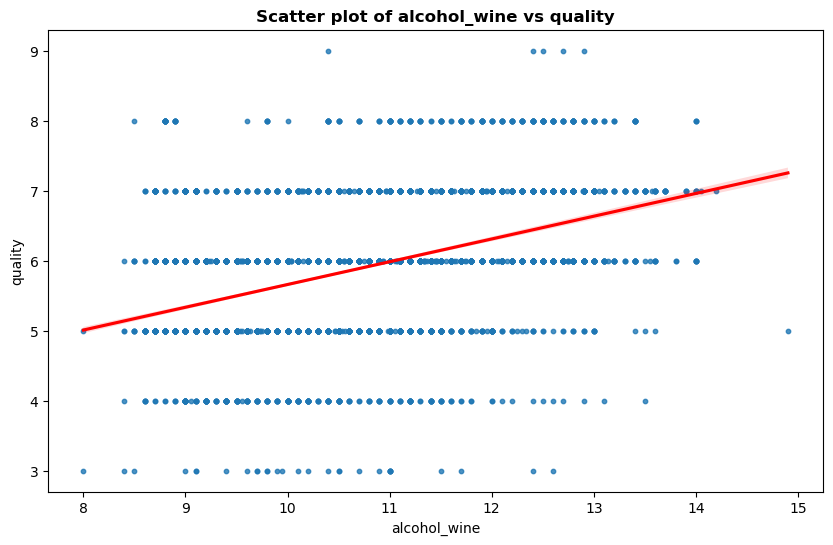

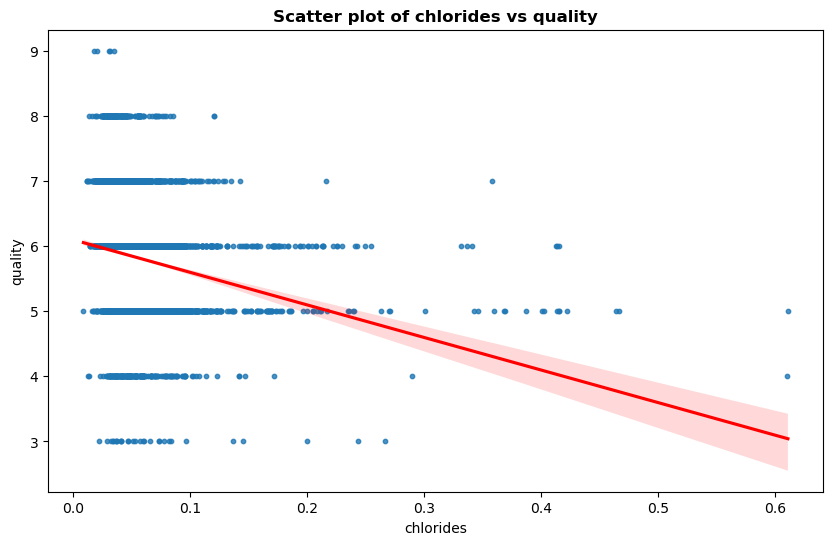

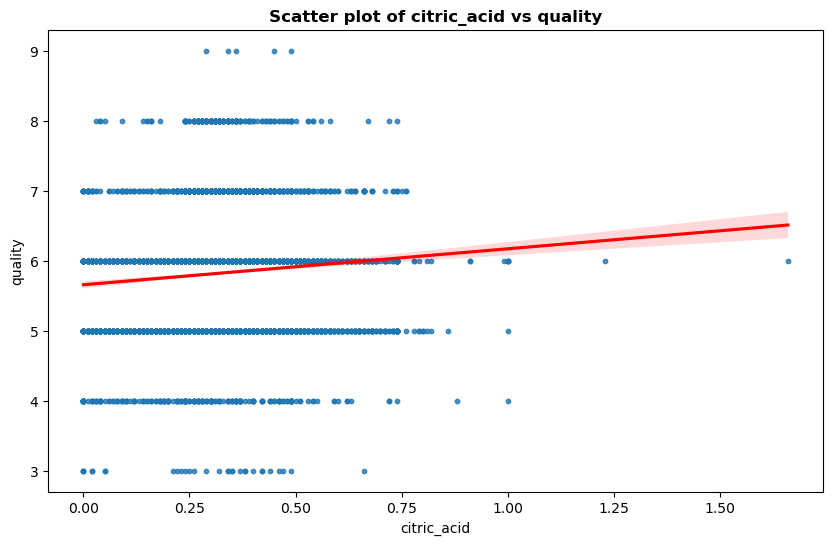

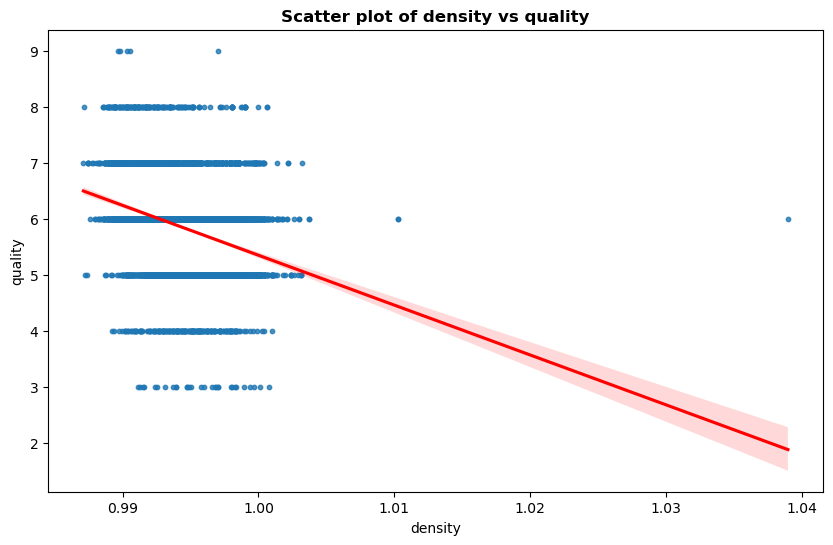

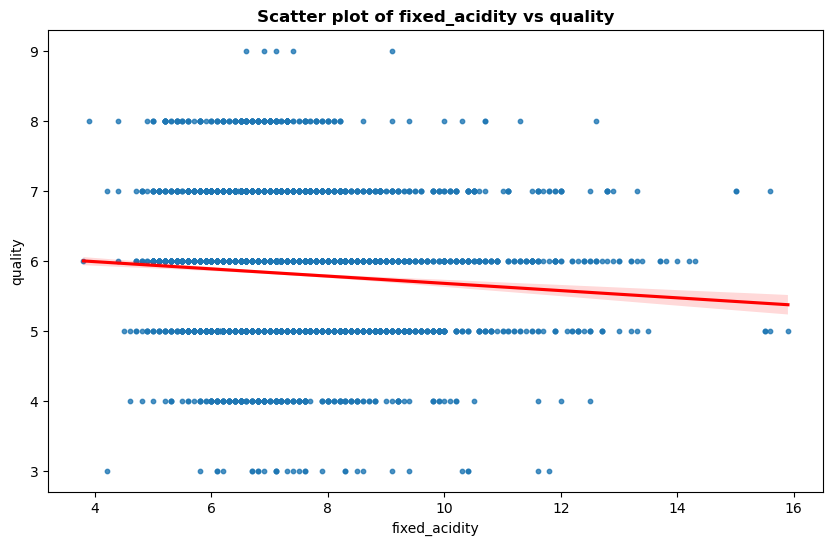

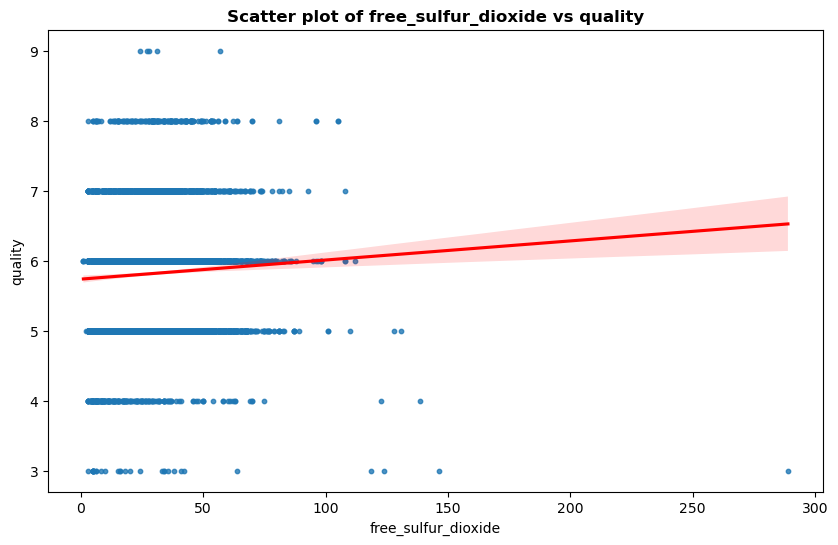

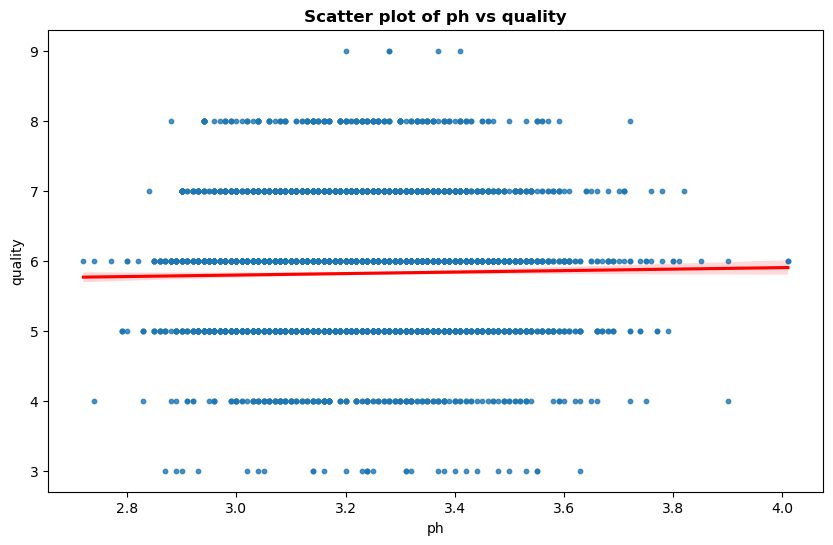

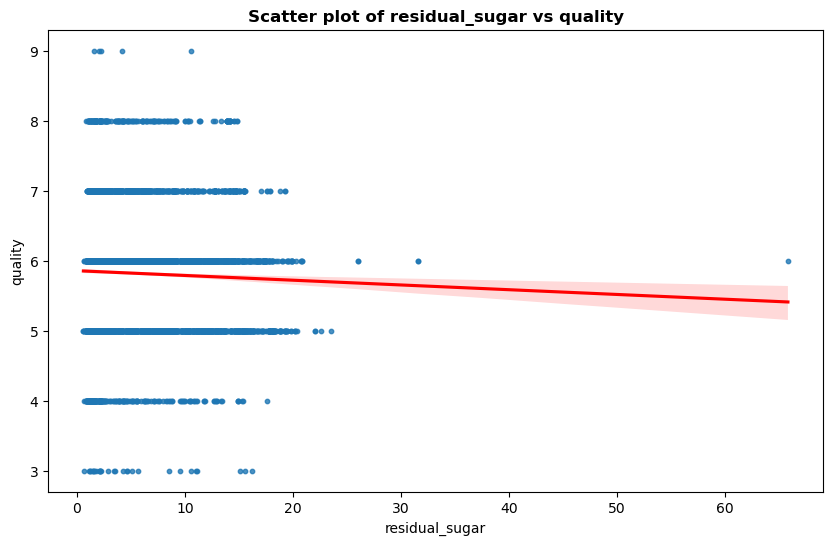

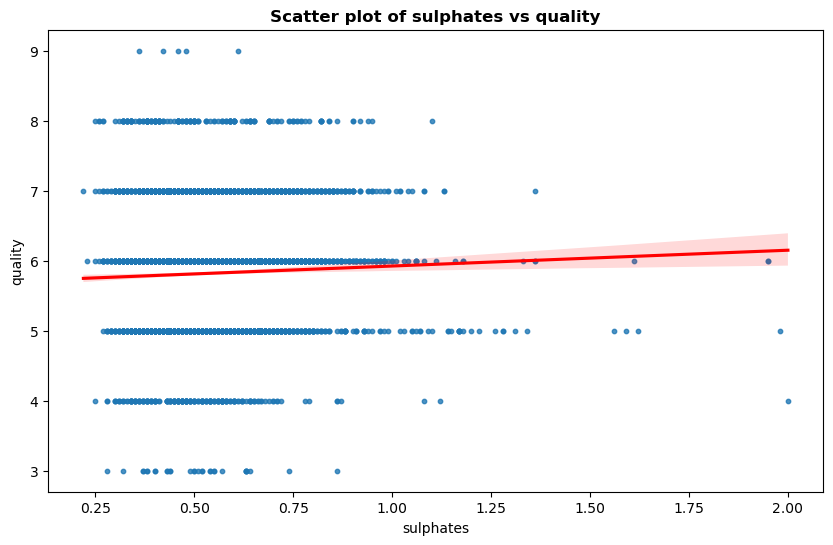

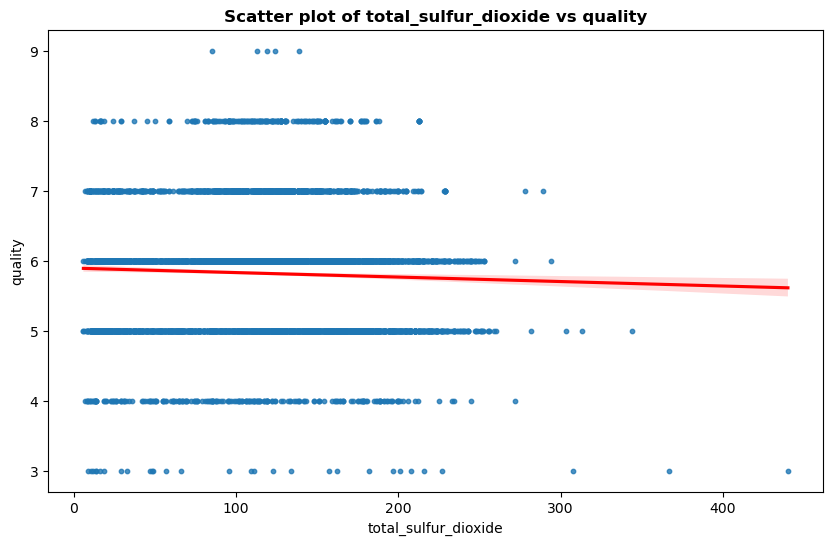

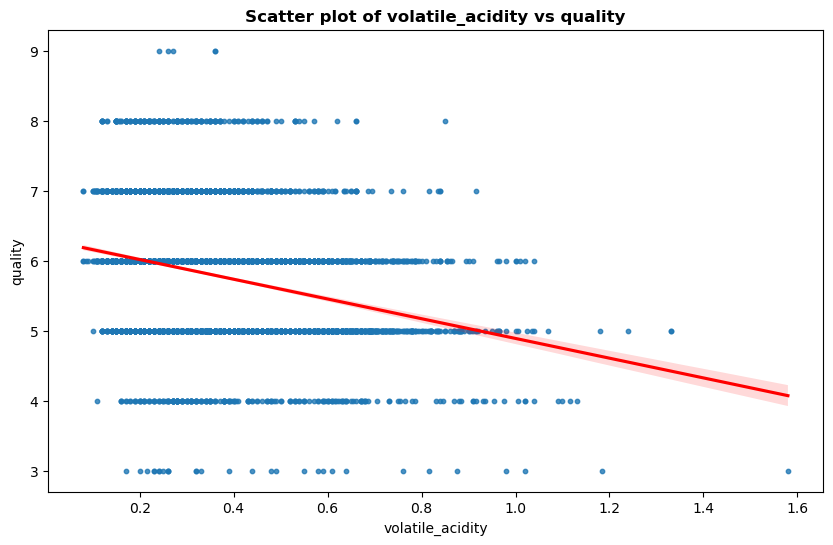

In [11]:
# Import seaborn
import seaborn as sns

# Remove non-numeric columns 
wines_df_numeric = wines_df.drop(columns=['id', 'type', 'quality_categorisation'])

# Calculate correlation between features and quality
correlations = wines_df_numeric.corr()['quality'].sort_values(ascending=False)
print("Each feature correlation with target variable 'quality':")
print(correlations)

# Plot scatter plot with red regression line
def plot_regression(df, features, target):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.regplot(x=df[feature], y=df[target], scatter_kws={'s':10}, line_kws={'color': 'red'})
        
        # Set title in bold
        plt.title(f'Scatter plot of {feature} vs {target}', fontweight='bold')
        plt.xlabel(feature)
        plt.ylabel(target)
        
        plt.show()

# Plot scatter plots with red regression lines
features = wines_df_numeric.columns.difference(['quality'])
plot_regression(wines_df_numeric, features, 'quality')